# Imports

In [28]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import sys

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))
from ev_forecasting_package.data_processing.VehicleRegistrationDataProcessing import LSOAVehicleRegistrationDataProcessor
from ev_forecasting_package.data_processing.SpatialDataProcessing import DistributionSubstationDataProcessor, LSOABoundariesDataProcessor
from ev_forecasting_package.models.DataMapper import DataMapper

# Processing the Data

Vehicle registration data for LSOAs in BANES

In [2]:
lsoa_vehicle_registration_data_processor = LSOAVehicleRegistrationDataProcessor(
    lsoa_lookup_path='../data/large_datasets/lsoa_boundaries/LSOA_(2011)_to_LSOA_(2021)_to_Local_Authority_District_(2022)_Lookup_for_England_and_Wales_(Version_2).csv'
)
raw_data_path = '../data/large_datasets/vehicle_registrations/raw_data'
meta_data = {
    'v_reg': {
        'file_name': 'df_VEH0125_2023_Q4.csv',
        'first': 5,
        'last': 57,
        'na_values': ['[c]', '[x]'],
    },
    'piv_reg': {
        'file_name': 'df_VEH0145_2023_Q4.csv',
        'first': 5,
        'last': 56,
        'na_values': ['[c]', '[x]'],
    }
}
filters_dict = {
    'v_reg': {
        'query': "BodyType == 'Cars' and Keepership == 'Private' and LicenceStatus == 'Licensed'",
        'dropped_cols': ['BodyType', 'Keepership', 'LicenceStatus', 'LSOA11NM']
    },
    'piv_reg': {
        'query': "Keepership == 'Private'",
        'dropped_cols': ['Keepership', 'LSOA11NM'] 
    }
}
LAD = 'Bath and North East Somerset'
lsoa_vehicle_registration_data_processor.run_pipeline(raw_data_path, meta_data, filters_dict, LAD)

Loading v_reg data from ../data/large_datasets/vehicle_registrations/raw_data/df_VEH0125_2023_Q4.csv
Loading piv_reg data from ../data/large_datasets/vehicle_registrations/raw_data/df_VEH0145_2023_Q4.csv
Pipeline run successfully


In [3]:
lsoa_vehicle_registration_data_processor.v_reg_df.head()

LSOA11CD,E01014370,E01014371,E01014372,E01014373,E01014374,E01014375,E01014376,E01014377,E01014379,E01014380,...,E01014478,E01014479,E01014480,E01014481,E01014482,E01014483,E01014484,E01033078,E01033079,E01033080
2009 Q4,386.0,557.0,591.0,703.0,641.0,799.0,957.0,872.0,1206.0,649.0,...,372.0,708.0,438.0,360.0,664.0,440.0,363.0,981.0,707.0,601.0
2010 Q1,384.0,547.0,595.0,692.0,627.0,791.0,966.0,876.0,1195.0,649.0,...,372.0,695.0,426.0,352.0,649.0,449.0,361.0,981.0,705.0,604.0
2010 Q2,378.0,549.0,604.0,696.0,628.0,805.0,966.0,868.0,1226.0,652.0,...,375.0,702.0,426.0,353.0,642.0,451.0,358.0,974.0,705.0,622.0
2010 Q3,406.0,538.0,588.0,684.0,637.0,811.0,975.0,865.0,1222.0,643.0,...,381.0,699.0,430.0,350.0,653.0,450.0,363.0,991.0,729.0,622.0
2010 Q4,389.0,540.0,561.0,692.0,633.0,804.0,982.0,839.0,1227.0,632.0,...,381.0,714.0,429.0,355.0,655.0,438.0,361.0,998.0,725.0,631.0


Distribution substation data for BANES

In [4]:
distribution_substation_data_processor = DistributionSubstationDataProcessor('../data/large_datasets/distribution_network/')
distribution_substation_data_processor.run_pipeline(
    ds_data_filename='distribution-substations-03-02-25.csv', 
    ds_geo_filename='south-west-distribution-03-02-25.gpkg',
    place='Bath and North East Somerset'
)
ds_gdf_banes = distribution_substation_data_processor.ds_gdf_filtered
ds_gdf_banes.head()

,Substation Number,geometry,NRID,NR_TYPE_ID,NAME,PRIM_NRID,PRIM_NR,PRIM_NRID_NAME,BSP_NRID,BSP_NR,...,Name,Grid Reference,Longitude,Latitude,Day Max Demand,Night Max Demand,Substation Rating,EV Chargers,Customers,Location
Substation Number,,,,,,,,,,,,,,,,,,,,,
110055,110055,"POLYGON ((-2.46167 51.39973, -2.46174 51.39976...",33528,19,Saltford Od,15042,111481,Keynsham East,119,162633,...,Saltford Od,ST682140670940,-2.45840,51.401900,302.0,205.0,500.0,3.0,132.0,POINT (-2.4584 51.4019)
110060,110060,"POLYGON ((-2.49497 51.40702, -2.49581 51.40727...",33532,19,Keelings Ss,15042,111481,Keynsham East,119,162633,...,Keelings Ss,ST658270679910,-2.49280,51.409800,132.0,65.0,315.0,2.0,113.0,POINT (-2.4928 51.4098)
110066,110066,"POLYGON ((-2.49769 51.40349, -2.49779 51.40351...",33542,19,Burnett Rd K,15042,111481,Keynsham East,119,162633,...,Burnett Rd K,ST658460673840,-2.49242,51.404389,116.0,58.0,300.0,4.0,95.0,POINT (-2.49242 51.40439)
110165,110165,"POLYGON ((-2.5136 51.41669, -2.51393 51.41716,...",33683,19,Stockwood Vale Od,15049,113180,Keynsham West,128239,113372,...,Stockwood Vale Od,ST644800689440,-2.51220,51.418300,69.0,34.0,500.0,0.0,47.0,POINT (-2.5122 51.4183)
110182,110182,"POLYGON ((-2.46675 51.40341, -2.46675 51.40341...",33715,19,Grange Road K,15042,111481,Keynsham East,119,162633,...,Grange Road K Saltford,ST677120673570,-2.46560,51.404300,78.0,41.0,315.0,4.0,55.0,POINT (-2.4656 51.4043)


LSOA boundary data for BANES

In [5]:
lsoa_boundaries_data_processor = LSOABoundariesDataProcessor('../data/large_datasets/lsoa_boundaries/')
lsoa_boundaries_data_processor.run_pipeline(
    lsoa_geo_filename='LSOA_2011_EW_BFC_V3_WGS84/LSOA_2011_EW_BFC_V3_WGS84.shp',
    lad='Bath and North East Somerset'
)
lsoa_gdf_banes = lsoa_boundaries_data_processor.lsoa_gdf_filtered
lsoa_gdf_banes.head()

,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,GlobalID,geometry
LSOA11CD,,,,,,,,
E01014370,Bath and North East Somerset 007A,375084,164994,-2.35941,51.3834,4168.323516,764bfbce-a1cc-4028-be4b-26902051bf9e,"POLYGON ((-2.35647 51.3892, -2.35618 51.38913,..."
E01014371,Bath and North East Somerset 007B,375328,164841,-2.35590,51.3821,4146.079795,213bd1e8-27ac-4ffc-8401-5c79156dc8f0,"POLYGON ((-2.35166 51.38534, -2.35158 51.3853,..."
E01014372,Bath and North East Somerset 007C,374832,165378,-2.36306,51.3869,2870.144109,65aeea18-794e-4244-8a7b-d820f94a90a0,"POLYGON ((-2.35597 51.3895, -2.35587 51.38942,..."
E01014373,Bath and North East Somerset 010A,377791,167691,-2.32068,51.4078,6720.118267,396a2c40-1a96-4bee-b5d2-317e937ae4ae,"POLYGON ((-2.32115 51.41364, -2.32114 51.41364..."
E01014374,Bath and North East Somerset 010B,378059,166769,-2.31677,51.3995,19927.251976,b192f67c-f8df-4435-bb2f-abaefc0ce29e,"POLYGON ((-2.30592 51.40806, -2.30591 51.40806..."


# Using the DataMapper Class

Firstly, we need to create an instance of the `DataMapper` class. We'll call this `data_mapper`.

The `DataMapper` class takes three inputs in the creation of an instance:
- `source_geometries` - The geometries of the areas containing the data we wish to map from. These are often administrative boundaries like LSOAs in this example.
- `target_geometries` - The geometries of the areas we wish to map data to. These can respresent the electricity supply areas of distribution substations (as is the case in this example).
- `target_customer_counts` - The number of customers/households contained within each target area.
- `probabilistic_rho` - A boolean variable that determines whether the proportion of customers contributed from each target geography to the source geography ($\rho$) is calculated probabilistically (By estimating the moments (mean and standard devation) of a beta distribution) or deterministically (taking simple proportions). If the precise locations of customers are known, $\rho$ can be calculated deterministically. However, if they are not known, the probabilistic approach introduces additional uncertainty into the mapping process. Currently, the precise customer locations are not modelled, but this could be updated in future versions (e.g. by leveraging Ordinance Survey data).

In [247]:
data_mapper = DataMapper(
    source_geometries=lsoa_gdf_banes.geometry,
    target_geometries=ds_gdf_banes.geometry,
    target_customer_counts=ds_gdf_banes.Customers,
    probabilisitic_rho=False
)

Next, we need to create a dictionary that contains the data that we wish to map. In this example, we want to map LSOA-level vehicle registration data to distribution substations in the BANES area. 

This data should have a ***mean*** and ***standard deviation (std_dev)***. If the data lacks uncertainty quantification, std_dev can be set to 0.

We'll store this data in the dictionary `data_dict`.

In [248]:
v_reg_data = lsoa_vehicle_registration_data_processor.v_reg_df.loc['2023 Q4']
bev_reg_data = lsoa_vehicle_registration_data_processor.bev_reg_df.loc['2023 Q4']
phev_reg_data = lsoa_vehicle_registration_data_processor.phev_reg_df.loc['2023 Q4']

data_dict = {
    'Vehicles' : pd.DataFrame({'mean': v_reg_data, 'std_dev': v_reg_data*0.}),
    'BEVs' : pd.DataFrame({'mean': bev_reg_data, 'std_dev': bev_reg_data*0.}),
    'PHEVs' : pd.DataFrame({'mean': phev_reg_data, 'std_dev': phev_reg_data*0.})
} # Example std_dev used here

To map the data to the target geographies, we run the method `.map_data()`, which is given the data dictionary we just created.

The mean and standard deviations of the mapped data are stored in a dictionary called `mapped_data_params`. 

In [249]:
data_mapper.map_data(data_dict)
data_mapper.mapped_data_params['Vehicles'].head()

,mean,std_dev
Substation Number,,
110055,148.006526,11.429402
110060,124.242632,10.829515
110066,120.700671,10.568473
110165,41.506426,6.377550
110182,72.189632,8.295572


Quantiles (0 to 1 in 0.01 intervals) for the mapped estimates can be accessed in the `quantiles_dict` dictionary, with keys matching the original unmapped data dictionary. 

In [39]:
data_mapper.quantiles_dict['Vehicles']

Substation Number,110055,110060,110066,110165,110182,110215,110234,110249,110258,110308,...,794539,794611,794653,794726,794727,794750,794759,794843,794920,794921
0.00,81.089741,60.832111,56.853787,6.508933,21.457848,56.029815,100.509398,107.267116,76.612668,134.600124,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.331211,0.000000,0.000000,0.000000
0.01,109.088596,87.363899,83.568155,21.152340,42.684687,82.341792,131.773126,136.247948,105.102878,167.118047,...,0.434596,0.000000,0.000000,0.000000,0.000000,0.000000,31.954254,0.000000,0.000000,0.000000
0.02,113.648957,91.685310,87.919304,23.537410,46.142045,86.627400,136.865259,140.968251,109.743270,172.414459,...,1.660917,0.000000,0.000000,0.000000,0.000000,0.000000,34.661760,0.457694,0.000000,0.000000
0.03,116.542360,94.427107,90.679968,25.050661,48.335628,89.346481,140.096055,143.963132,112.687450,175.774863,...,2.438979,0.000000,0.000000,0.000000,0.000000,0.000000,36.379586,1.027288,0.000000,0.000000
0.04,118.718955,96.489653,92.756709,26.189020,49.985775,91.391940,142.526456,146.216064,114.902241,178.302764,...,3.024284,0.000000,0.000000,0.000000,0.000000,0.000000,37.671840,1.455771,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.96,177.294097,151.995611,148.644634,56.823831,94.393488,146.438040,207.931892,206.845557,174.505325,246.332043,...,18.775653,0.000002,6.878568,0.000002,0.000002,0.000002,72.448158,12.986840,0.000002,0.000002
0.97,179.470691,154.058158,150.721374,57.962191,96.043635,148.483499,210.362293,209.098489,176.720117,248.859944,...,19.360958,0.000002,7.159767,0.000002,0.000002,0.000002,73.740411,13.415323,0.000002,0.000002
0.98,182.364094,156.799954,153.482039,59.475441,98.237218,151.202580,213.593089,212.093370,179.664297,252.220348,...,20.139019,0.000002,7.533572,0.000002,0.000002,0.000002,75.458237,13.984916,0.000002,0.000002
0.99,186.924456,161.121365,157.833187,61.860511,101.694576,155.488188,218.685222,216.813673,184.304688,257.516761,...,21.365341,0.000002,8.122735,0.000002,0.000002,0.000002,78.165744,14.882667,0.000002,0.000002


The mean mapped data can be plotted using the `.plot_mapped_data_mean()` method, which requires the name of the data you wish to map (the dame name as is defined in the data dictionary).

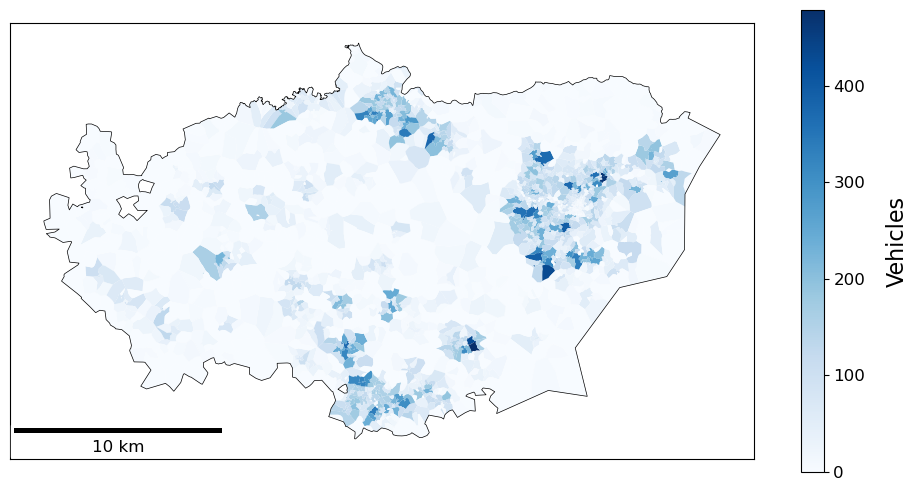

In [40]:
data_mapper.plot_mapped_data_mean(data_name='Vehicles')

# Validation

Here we simulate the exact location of vehicles within LSOAs as follows:
1. Initialise a population inside LSOAs based on substation customer distributions.
2. Randomly allocate assets to this population, assumming that each customer in an LSOA has an equal chance of owning a particular asset.
3. Count the number of assets present in each substation area.

Currently, we actually allocated parking spaces (3 per customer) to account for multiple vehicle ownership. Alternatively, I could sample the customers with replacement?

In [235]:
from tqdm.notebook import tqdm

class VehicleOwnershipSimulator:
    def __init__(self, target_customer_data: gpd.GeoDataFrame, source_geography_data: gpd.GeoDataFrame, total_vehicles_in_source_geography: pd.Series):
        self.target_customer_data = target_customer_data
        self.source_geography_data = source_geography_data
        self.total_vehicles_in_source_geography = total_vehicles_in_source_geography
        self.customer_locations = self.initialise_customer_locations()
        self.simulated_vehicles = None

    def initialise_customer_locations(self) -> gpd.GeoDataFrame:
        target_index = self.target_customer_data.index
        # Initialise GeoSeries and counts
        customer_locations = gpd.GeoSeries(index=target_index, crs=ds_gdf_banes.crs)
        customer_counts = self.target_customer_data['Customers'].fillna(0).astype(int)

        for i, idx in enumerate(target_index):
            n_samples = customer_counts.iloc[i]
            customer_locations.iloc[i] = self.target_customer_data.geometry.iloc[i:i+1].sample_points(n_samples).iloc[0]

        customer_locations_flat = gpd.GeoDataFrame(
            geometry=[point for multipoint in customer_locations for point in multipoint.geoms],
            crs=self.target_customer_data.crs
        )

        return customer_locations_flat
    
    def simulate_vehicle_ownership(self, n_sims: int):
        customers_gdf = self.link_customers_to_source_geography()
        self.simulated_vehicles = pd.DataFrame(index=self.target_customer_data.index, columns=np.arange(n_sims))
        for sim in tqdm(range(n_sims)):
            customers_and_vehicles_gdf = self.assign_vehicles(customers_gdf=customers_gdf, source_idx_name='LSOA11CD')
            aggregated_vehicle_counts = self.count_vehicles(customers_and_vehicles_gdf)
            self.simulated_vehicles[sim] = aggregated_vehicle_counts
    
    def link_customers_to_source_geography(self) -> gpd.GeoDataFrame:
        return gpd.sjoin(self.customer_locations, self.source_geography_data, predicate="within")
    
    def assign_vehicles(self, customers_gdf: gpd.GeoDataFrame, source_idx_name: str) -> gpd.GeoDataFrame:
        # np.random.seed(42)  # For reproducibility
        customers_gdf['num_vehicles'] = 0  # Initialise column
        
        for source_geography, total_vehicles in self.total_vehicles_in_source_geography.items():
            # Select customers in this source geography
            source_customers_gdf = customers_gdf[customers_gdf[source_idx_name] == source_geography]
            
            # Sample customers with replacement to assign vehicles
            assigned_customers = np.random.choice(source_customers_gdf.index, total_vehicles, replace=True)
            
            # Count vehicle assignments per household
            vehicle_counts = pd.Series(assigned_customers).value_counts()
            
            # Update the DataFrame
            customers_gdf.loc[vehicle_counts.index, 'num_vehicles'] = vehicle_counts.values
        
        return customers_gdf
    
    def count_vehicles(self, customers_and_vehicles_gdf : gpd.GeoDataFrame) -> pd.Series:
        vehicle_counts_gdf = gpd.sjoin(customers_and_vehicles_gdf , self.target_customer_data, predicate="within")
        aggregated_vehicle_counts_full = pd.Series(index=self.target_customer_data.index, data=0)
        aggregated_vehicle_counts = vehicle_counts_gdf.groupby(vehicle_counts_gdf[self.target_customer_data.index.name])['num_vehicles'].sum()
        aggregated_vehicle_counts_full.loc[aggregated_vehicle_counts.index] = aggregated_vehicle_counts
        return aggregated_vehicle_counts_full

In [253]:
vehicle_ownership_simulator = VehicleOwnershipSimulator(
    target_customer_data=ds_gdf_banes.drop(columns=['Substation Number']),
    source_geography_data=lsoa_gdf_banes,
    total_vehicles_in_source_geography=v_reg_data.astype(int)
)

vehicle_ownership_simulator.simulate_vehicle_ownership(n_sims=200)

In [265]:
vehicle_ownership_simulator.simulated_vehicles.T

Substation Number,110055,110060,110066,110165,110182,110215,110234,110249,110258,110308,...,794539,794611,794653,794726,794727,794750,794759,794843,794920,794921
0,156,121,122,54,79,114,163,187,127,213,...,18,0,4,0,0,0,75,10,0,0
1,134,107,122,38,60,123,177,161,126,197,...,13,0,2,0,0,0,67,7,0,0
2,162,116,124,31,63,117,180,197,140,187,...,12,0,1,0,0,0,44,6,0,0
3,149,123,109,34,73,126,176,180,133,214,...,13,0,7,0,0,0,52,2,0,0
4,140,133,118,38,78,134,179,198,147,186,...,10,0,3,0,0,0,60,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,169,107,114,42,69,116,168,188,146,231,...,10,0,3,0,0,0,33,14,0,0
196,158,116,117,40,75,126,141,195,125,192,...,9,0,4,0,0,0,60,8,0,0
197,152,114,114,51,55,115,188,176,132,222,...,17,0,6,0,0,0,46,11,0,0
198,135,120,123,41,72,123,201,195,150,217,...,15,0,4,0,0,0,53,9,0,0


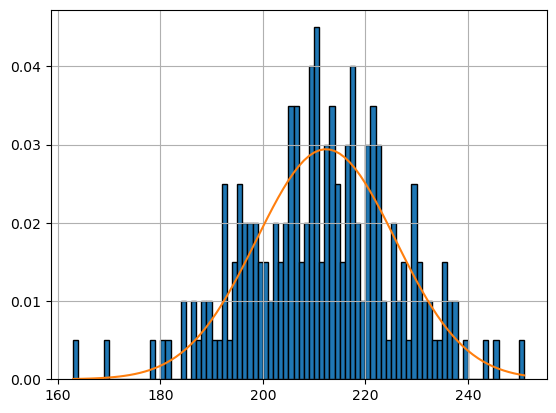

In [264]:
import scipy.stats as stats
import matplotlib.pyplot as plt

i=9

# Extract the relevant column
data = vehicle_ownership_simulator.simulated_vehicles.T.iloc[:, i]

# Define bin edges: start at min, end at max+1 (to include the max value), with step size 1
bins = range(int(data.min()), int(data.max()) + 2)  # +2 ensures max is included

# Create the histogram
data.hist(bins=bins, edgecolor='black', density=True)

mean = data_mapper.mapped_data_params['Vehicles']['mean'].iloc[i]
std_dev = data_mapper.mapped_data_params['Vehicles']['std_dev'].iloc[i]

plt.plot(bins, stats.norm.pdf(bins, loc=mean, scale=std_dev))

# Show the plot
plt.show()

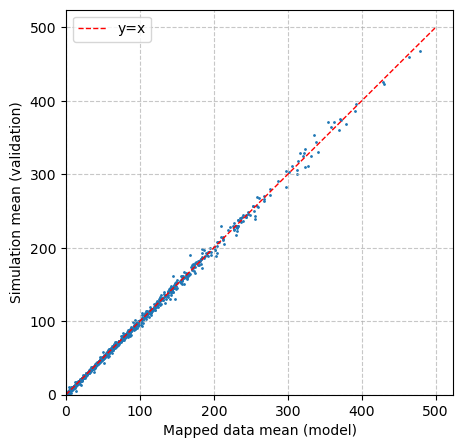

In [256]:
plt.figure(figsize=(5, 5))
plt.scatter(
    x=data_mapper.mapped_data_params['Vehicles']['mean'],
    y=vehicle_ownership_simulator.simulated_vehicles.T.mean(),
    s=1,
)
plt.plot(
    np.arange(0, 500, 1),
    np.arange(0, 500, 1),
    lw=1,
    linestyle='--',
    color='red',
    label=r'y=x'
)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Mapped data mean (model)')
plt.ylabel('Simulation mean (validation)')
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()

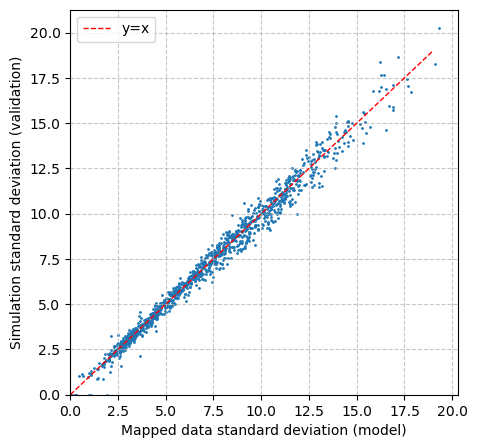

In [257]:
plt.figure(figsize=(5, 5))
plt.scatter(
    x=data_mapper.mapped_data_params['Vehicles']['std_dev'],
    y=vehicle_ownership_simulator.simulated_vehicles.T.std(),
    s=1,
)
plt.plot(
    np.arange(0, 20, 1),
    np.arange(0, 20, 1),
    lw=1,
    linestyle='--',
    color='red',
    label=r'y=x'
)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Mapped data standard deviation (model)')
plt.ylabel('Simulation standard deviation (validation)')
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### Validating probabilistic rho

In [273]:
from tqdm.notebook import tqdm

class VehicleOwnershipSimulatorSlow:
    def __init__(self, target_customer_data: gpd.GeoDataFrame, source_geography_data: gpd.GeoDataFrame, total_vehicles_in_source_geography: pd.Series):
        self.target_customer_data = target_customer_data
        self.source_geography_data = source_geography_data
        self.total_vehicles_in_source_geography = total_vehicles_in_source_geography
        self.simulated_vehicles = None

    def initialise_customer_locations(self) -> gpd.GeoDataFrame:
        target_index = self.target_customer_data.index
        # Initialise GeoSeries and counts
        customer_locations = gpd.GeoSeries(index=target_index, crs=ds_gdf_banes.crs)
        customer_counts = self.target_customer_data['Customers'].fillna(0).astype(int)

        for i, idx in enumerate(target_index):
            n_samples = customer_counts.iloc[i]
            customer_locations.iloc[i] = self.target_customer_data.geometry.iloc[i:i+1].sample_points(n_samples).iloc[0]

        customer_locations_flat = gpd.GeoDataFrame(
            geometry=[point for multipoint in customer_locations for point in multipoint.geoms],
            crs=self.target_customer_data.crs
        )

        return customer_locations_flat
    
    def simulate_vehicle_ownership(self, n_sims: int):
        self.simulated_vehicles = pd.DataFrame(index=self.target_customer_data.index, columns=np.arange(n_sims))
        for sim in tqdm(range(n_sims)):
            self.customer_locations = self.initialise_customer_locations()
            customers_gdf = self.link_customers_to_source_geography()
            customers_and_vehicles_gdf = self.assign_vehicles(customers_gdf=customers_gdf, source_idx_name='LSOA11CD')
            aggregated_vehicle_counts = self.count_vehicles(customers_and_vehicles_gdf)
            self.simulated_vehicles[sim] = aggregated_vehicle_counts
    
    def link_customers_to_source_geography(self) -> gpd.GeoDataFrame:
        return gpd.sjoin(self.customer_locations, self.source_geography_data, predicate="within")
    
    def assign_vehicles(self, customers_gdf: gpd.GeoDataFrame, source_idx_name: str) -> gpd.GeoDataFrame:
        # np.random.seed(42)  # For reproducibility
        customers_gdf['num_vehicles'] = 0  # Initialise column
        
        for source_geography, total_vehicles in self.total_vehicles_in_source_geography.items():
            # Select customers in this source geography
            source_customers_gdf = customers_gdf[customers_gdf[source_idx_name] == source_geography]
            
            # Sample customers with replacement to assign vehicles
            assigned_customers = np.random.choice(source_customers_gdf.index, total_vehicles, replace=True)
            
            # Count vehicle assignments per household
            vehicle_counts = pd.Series(assigned_customers).value_counts()
            
            # Update the DataFrame
            customers_gdf.loc[vehicle_counts.index, 'num_vehicles'] = vehicle_counts.values
        
        return customers_gdf
    
    def count_vehicles(self, customers_and_vehicles_gdf : gpd.GeoDataFrame) -> pd.Series:
        vehicle_counts_gdf = gpd.sjoin(customers_and_vehicles_gdf , self.target_customer_data, predicate="within")
        aggregated_vehicle_counts_full = pd.Series(index=self.target_customer_data.index, data=0)
        aggregated_vehicle_counts = vehicle_counts_gdf.groupby(vehicle_counts_gdf[self.target_customer_data.index.name])['num_vehicles'].sum()
        aggregated_vehicle_counts_full.loc[aggregated_vehicle_counts.index] = aggregated_vehicle_counts
        return aggregated_vehicle_counts_full

In [276]:
vehicle_ownership_simulator_slow = VehicleOwnershipSimulatorSlow(
    target_customer_data=ds_gdf_banes.drop(columns=['Substation Number']),
    source_geography_data=lsoa_gdf_banes,
    total_vehicles_in_source_geography=v_reg_data.astype(int)
)

vehicle_ownership_simulator_slow.simulate_vehicle_ownership(n_sims=100)

In [278]:
vehicle_ownership_simulator_slow.simulated_vehicles.T

Substation Number,110055,110060,110066,110165,110182,110215,110234,110249,110258,110308,...,794539,794611,794653,794726,794727,794750,794759,794843,794920,794921
0,152,116,101,36,61,121,191,165,145,209,...,8,0,2,0,0,0,62,10,0,0
1,158,109,130,45,63,119,204,185,132,220,...,12,0,2,0,0,0,56,5,0,0
2,137,120,94,34,76,105,155,162,159,207,...,7,0,2,0,0,0,51,5,0,0
3,141,114,133,26,80,114,174,183,140,208,...,18,0,9,0,0,0,56,6,0,0
4,155,125,113,57,74,140,176,165,139,202,...,8,0,2,0,0,0,60,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,161,135,114,49,61,117,180,185,156,197,...,7,0,1,0,0,0,54,7,0,0
96,155,103,114,48,71,135,208,190,140,214,...,12,0,4,0,0,0,49,6,0,0
97,157,120,110,41,80,125,179,169,138,218,...,15,0,1,0,0,0,56,4,0,0
98,164,142,127,52,86,108,174,172,161,243,...,11,0,1,0,0,0,52,10,0,0


In [277]:
data_mapper_prob_rho = DataMapper(
    source_geometries=lsoa_gdf_banes.geometry,
    target_geometries=ds_gdf_banes.geometry,
    target_customer_counts=ds_gdf_banes.Customers,
    probabilisitic_rho=True
)

v_reg_data = lsoa_vehicle_registration_data_processor.v_reg_df.loc['2023 Q4']
bev_reg_data = lsoa_vehicle_registration_data_processor.bev_reg_df.loc['2023 Q4']
phev_reg_data = lsoa_vehicle_registration_data_processor.phev_reg_df.loc['2023 Q4']

data_dict = {
    'Vehicles' : pd.DataFrame({'mean': v_reg_data, 'std_dev': v_reg_data*0.}),
    'BEVs' : pd.DataFrame({'mean': bev_reg_data, 'std_dev': bev_reg_data*0.}),
    'PHEVs' : pd.DataFrame({'mean': phev_reg_data, 'std_dev': phev_reg_data*0.})
} # Example std_dev used here

data_mapper_prob_rho.map_data(data_dict)
data_mapper_prob_rho.mapped_data_params['Vehicles'].head()

,mean,std_dev
Substation Number,,
110055,148.006526,16.729196
110060,124.242632,15.852630
110066,120.700671,15.961721
110165,41.506426,8.749373
110182,72.189632,12.682946


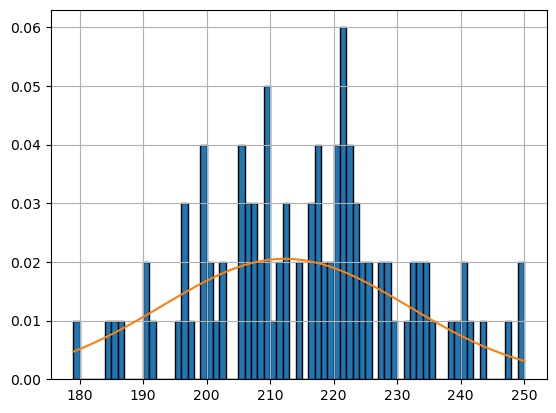

In [279]:
import scipy.stats as stats
import matplotlib.pyplot as plt

i=9

# Extract the relevant column
data = vehicle_ownership_simulator_slow.simulated_vehicles.T.iloc[:, i]

# Define bin edges: start at min, end at max+1 (to include the max value), with step size 1
bins = range(int(data.min()), int(data.max()) + 2)  # +2 ensures max is included

# Create the histogram
data.hist(bins=bins, edgecolor='black', density=True)

mean = data_mapper_prob_rho.mapped_data_params['Vehicles']['mean'].iloc[i]
std_dev = data_mapper_prob_rho.mapped_data_params['Vehicles']['std_dev'].iloc[i]

plt.plot(bins, stats.norm.pdf(bins, loc=mean, scale=std_dev))

# Show the plot
plt.show()

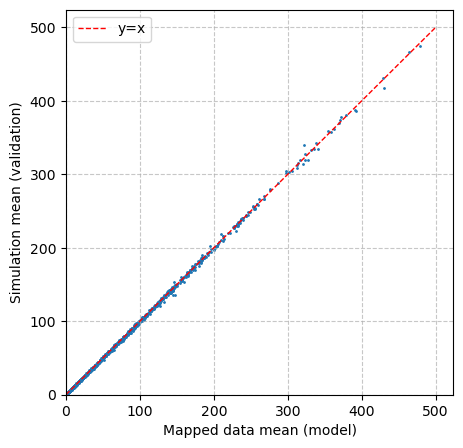

In [280]:
plt.figure(figsize=(5, 5))
plt.scatter(
    x=data_mapper_prob_rho.mapped_data_params['Vehicles']['mean'],
    y=vehicle_ownership_simulator_slow.simulated_vehicles.T.mean(),
    s=1,
)
plt.plot(
    np.arange(0, 500, 1),
    np.arange(0, 500, 1),
    lw=1,
    linestyle='--',
    color='red',
    label=r'y=x'
)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Mapped data mean (model)')
plt.ylabel('Simulation mean (validation)')
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()

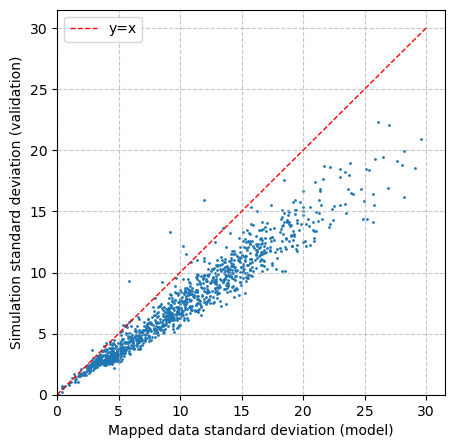

In [283]:
plt.figure(figsize=(5, 5))
plt.scatter(
    x=data_mapper_prob_rho.mapped_data_params['Vehicles']['std_dev'],
    y=vehicle_ownership_simulator_slow.simulated_vehicles.T.std(),
    s=1,
)
plt.plot(
    np.arange(0, 31, 1),
    np.arange(0, 31, 1),
    lw=1,
    linestyle='--',
    color='red',
    label=r'y=x'
)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Mapped data standard deviation (model)')
plt.ylabel('Simulation standard deviation (validation)')
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Using a probabilistic $\rho$ potentially over estimates uncertainty.